In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use("ggplot")

from sklearn.neighbors import KNeighborsClassifier
import os
from matplotlib.colors import ListedColormap
import warnings

In [25]:
df = pd.read_csv("NCAA_data.csv")
df.head()

,player_id,name,class,college,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,kenyon-martin-1,Kenyon Martin,Above Avg,cincinnati,142,292,0.587,0.586,0.494,0.581,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,aj-guyton-1,A.J. Guyton,Below Avg,indiana,403,52,0.541,0.455,0.249,0.790,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,jake-voskuhl-1,Jake Voskuhl,Below Avg,uconn,124,193,0.542,0.542,0.555,0.656,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,khalid-el-amin-1,Khalid El-Amin,Bust,uconn,479,10,0.486,0.416,0.257,0.822,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,mike-smith-1,Mike Smith,Bust,louisiana monroe,147,42,0.507,0.428,0.357,0.769,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [26]:
df.shape

(853, 29)

In [13]:
df.dtypes

player_id                           object
name                                object
class                               object
college                             object
assists                              int64
blocks                               int64
effective_field_goal_percentage    float64
field_goal_percentage              float64
free_throw_attempt_rate            float64
free_throw_percentage              float64
games_played                         int64
height                               int64
minutes_played                     float64
points                               int64
steals                               int64
three_point_percentage             float64
three_pointers                     float64
total_rebounds                       int64
true_shooting_percentage           float64
turnover_percentage                float64
turnovers                          float64
win_shares_per_40_minutes          float64
assists_per_40                     float64
blocks_per_

In [14]:
X = df.drop(["class","name","college","player_id"],axis = 1)
X.head()

,assists,blocks,effective_field_goal_percentage,field_goal_percentage,free_throw_attempt_rate,free_throw_percentage,games_played,height,minutes_played,points,...,turnover_percentage,turnovers,win_shares_per_40_minutes,assists_per_40,blocks_per_40,points_per_40,steals_per_40,three_pointers_per_40,total_rebounds_per_40,turnovers_per_40
0,142,292,0.587,0.586,0.494,0.581,116,81,2042.0,1279,...,14.3,139.0,0.346,2.781587,5.719882,25.053869,2.428991,0.039177,17.022527,2.722821
1,403,52,0.541,0.455,0.249,0.790,128,73,3260.0,2100,...,13.6,218.0,0.145,4.944785,0.638037,25.766871,1.582822,3.472393,5.263804,2.674847
2,124,193,0.542,0.542,0.555,0.656,138,83,2184.0,863,...,23.0,160.0,0.237,2.271062,3.534799,15.805861,1.575092,0.000000,16.117216,2.930403
3,479,10,0.486,0.416,0.257,0.822,108,70,2149.0,1650,...,15.6,188.0,0.158,8.915775,0.186133,30.711959,3.462075,3.629595,5.937645,3.499302
4,147,42,0.507,0.428,0.357,0.769,55,80,1938.0,1062,...,20.0,241.0,0.165,3.034056,0.866873,21.919505,1.857585,2.683179,9.267286,4.974200


In [15]:
target = df["class"]
target_names = ["All_Star","Above_Average","Average","Below_Average","Bust"]
target


0      Above Avg
1      Below Avg
2      Below Avg
3           Bust
4           Bust
5      Above Avg
6      Above Avg
7      Below Avg
8           Bust
9           Bust
10          Star
11     Below Avg
12     Below Avg
13          Bust
14     Above Avg
15     Below Avg
16          Bust
17          Bust
18          Bust
19          Bust
20          Bust
21     Below Avg
22          Bust
23     Below Avg
24     Above Avg
25     Below Avg
26     Above Avg
27     Below Avg
28     Above Avg
29     Above Avg
         ...    
823    Below Avg
824    Above Avg
825    Below Avg
826    Below Avg
827         Bust
828         Star
829    Above Avg
830    Above Avg
831    Above Avg
832    Above Avg
833    Above Avg
834    Below Avg
835    Below Avg
836    Above Avg
837    Above Avg
838    Below Avg
839    Below Avg
840         Bust
841    Below Avg
842         Star
843    Below Avg
844    Below Avg
845    Below Avg
846    Below Avg
847    Below Avg
848    Above Avg
849    Below Avg
850    Above A

In [7]:
#data = df.drop("class", axis =1)
#feature_names = data.columns
#data.head()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,target, random_state =42)

In [18]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='rbf')
model.fit(X_train, y_train)

C:\Users\Pournima\.conda\envs\PythonData\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [27]:
print('Test Acc: %.3f' %model.score(X_test, y_test))

Test Acc: 0.313


In [29]:
#calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
print(classification_report(y_test,predictions,
                           target_names =target_names))

ValueError: Number of classes, 4, does not match size of target_names, 5. Try specifying the labels parameter

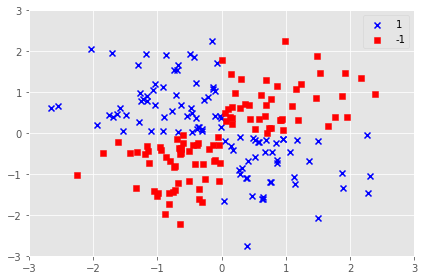

In [20]:
np.random.seed(0)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [21]:
# Create a SVC classifier using an RBF kernel
svm = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
# Train the classifier
svm.fit(X_xor, y_xor)

# Visualize the decision boundaries
plot_decision(X_xor, y_xor, classifier=svm)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

NameError: name 'plot_decision_regions' is not defined